## 6.5 Machine Learning part 2.

## This script contains the following:
### 1. Importing libraries and data 
### 2. The elbow technique¶
### 3. k-means clustering

## 1. importing libraries and data 

In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
path = r"C:\Users\solza\Downloads\02-11-2023"

In [3]:
df = pd.read_csv(r"C:\Users\solza\Downloads\02-11-2023\prepared\citybike_T62.csv")

In [4]:
df

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,Rider_Gender,Distance
0,0,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,Female,High_Latitude
1,1,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,Male,Mid_Latitude
2,2,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,Male,High_Latitude
3,3,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,Female,High_Latitude
4,4,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,Unknown,High_Latitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,17988,Sat,18,9/21/2013 18:39,479,9 Ave & W 45 St,40.760193,-73.991255,9/21/2013 20:08,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,Unknown,High_Latitude
49996,49996,18458,Sat,17,9/14/2013 17:32,261,Johnson St & Gold St,40.694749,-73.983625,9/14/2013 17:52,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,Female,Low_Latitude
49997,49997,15054,Sat,18,9/7/2013 18:08,402,Broadway & E 22 St,40.740343,-73.989551,9/7/2013 18:25,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,Female,High_Latitude
49998,49998,16763,Sat,13,9/7/2013 13:25,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,9/7/2013 14:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,Unknown,Low_Latitude


In [10]:
# as we can see we have catagorical columns. we need to keep the numerical 
df1 = df.drop(columns = ['Unnamed: 0', 'start_time', 'start_station_name', 'end_time', 'end_station_name', 'weekday', 'subscriber', 'Rider_Gender', 'Distance'])

In [11]:
df1

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration
0,16013,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993
1,15230,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581
2,17942,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361
3,19683,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561
4,18024,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296
...,...,...,...,...,...,...,...,...,...
49995,17988,18,479,40.760193,-73.991255,478,40.760301,-73.998842,2697
49996,18458,17,261,40.694749,-73.983625,151,40.721816,-73.997203,1191
49997,15054,18,402,40.740343,-73.989551,524,40.755273,-73.983169,1050
49998,16763,13,271,40.685282,-73.978058,373,40.693317,-73.953820,2697


## Elbow Technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-169486682505.36026,
 -65023676319.76571,
 -45306424284.16596,
 -38540366194.72055,
 -34532163385.710686,
 -30851758026.614117,
 -27520825656.71139,
 -25355182144.74806,
 -23219573188.10548]

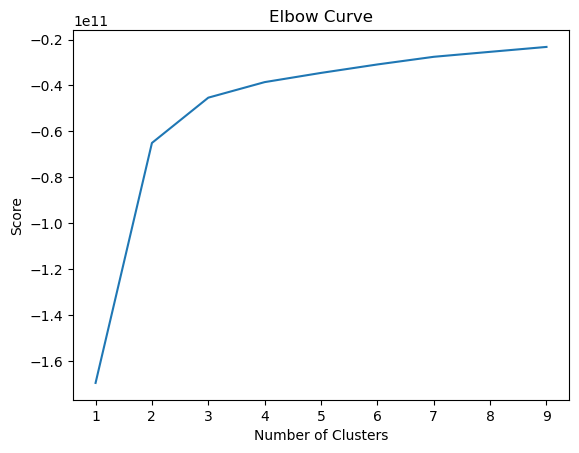

In [14]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### number of clusters

#### as we can see there is a large jump from 2 to 3 on the x-axis but then the curve straightens out. this means the optimal count for this cluster is 3

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [17]:
# Then fit the K-mean into the DF
kmeans.fit(df1)

KMeans(n_clusters=3)

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [20]:
df1['clusters'] = kmeans.fit_predict(df1)

In [21]:
df1.head()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,clusters
0,16013,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1
1,15230,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1
2,17942,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,0
3,19683,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,2
4,18024,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,0


In [22]:
# Verify if the clusters we correctly assigned with a general view
df1['clusters'].value_counts()

2    17342
0    16502
1    16156
Name: clusters, dtype: int64

## Plotting

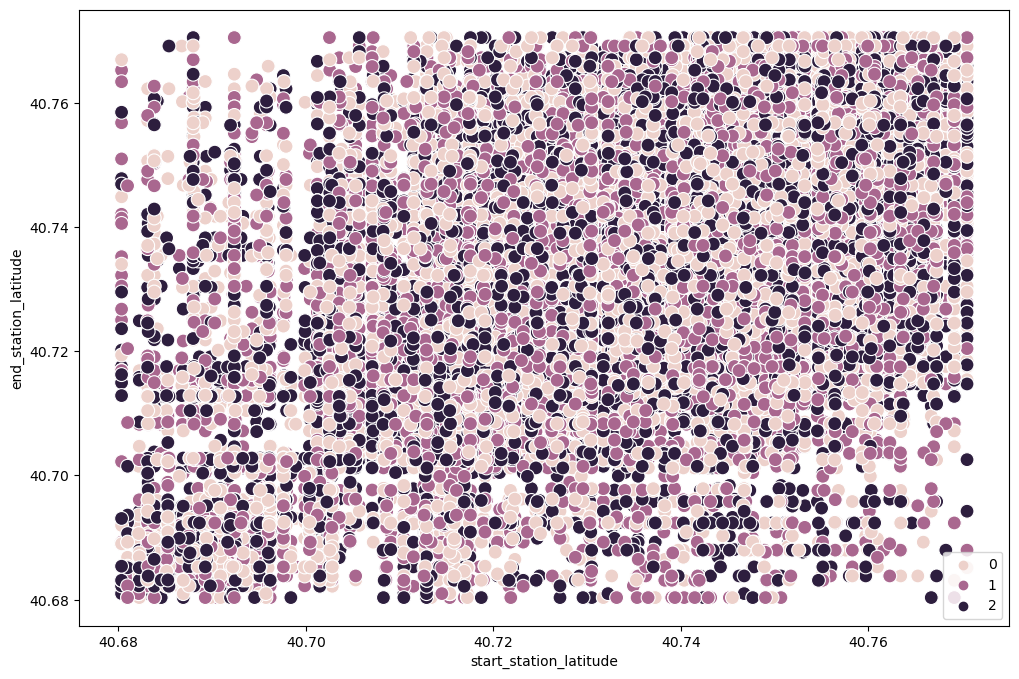

In [23]:
# And now plot it! First start_station_latitude and end_station_latitude compared

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['start_station_latitude'], y=df1['end_station_latitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_station_latitude') # Label x-axis.
plt.ylabel('end_station_latitude') # Label y-axis.
plt.show()

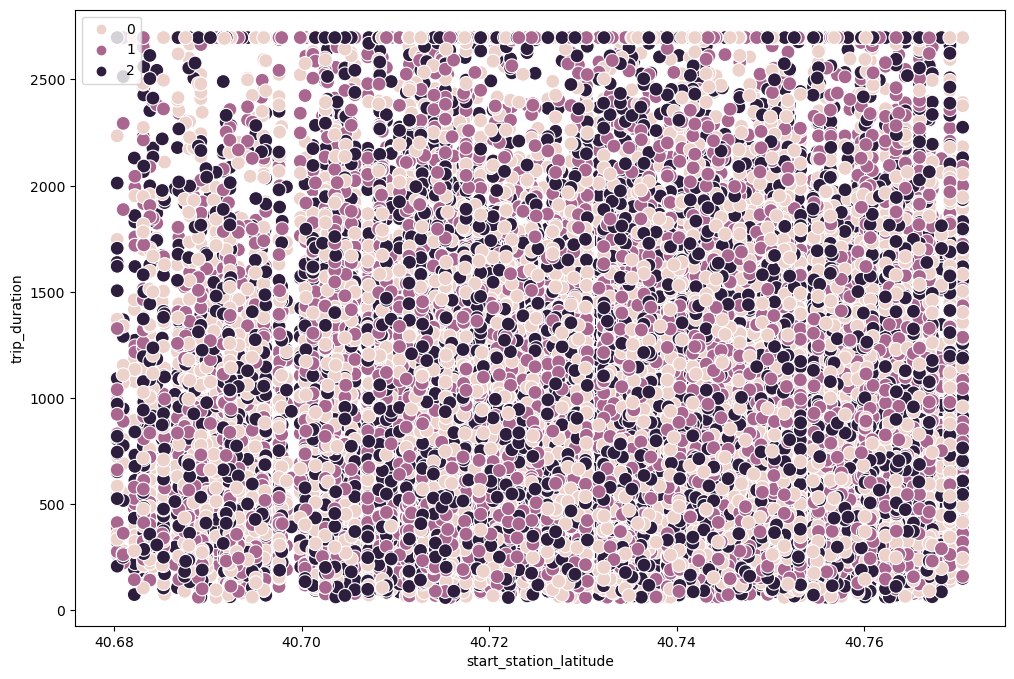

In [24]:
# Then, start_station_latitude and trip_duration.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['start_station_latitude'], y=df1['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_station_latitude') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

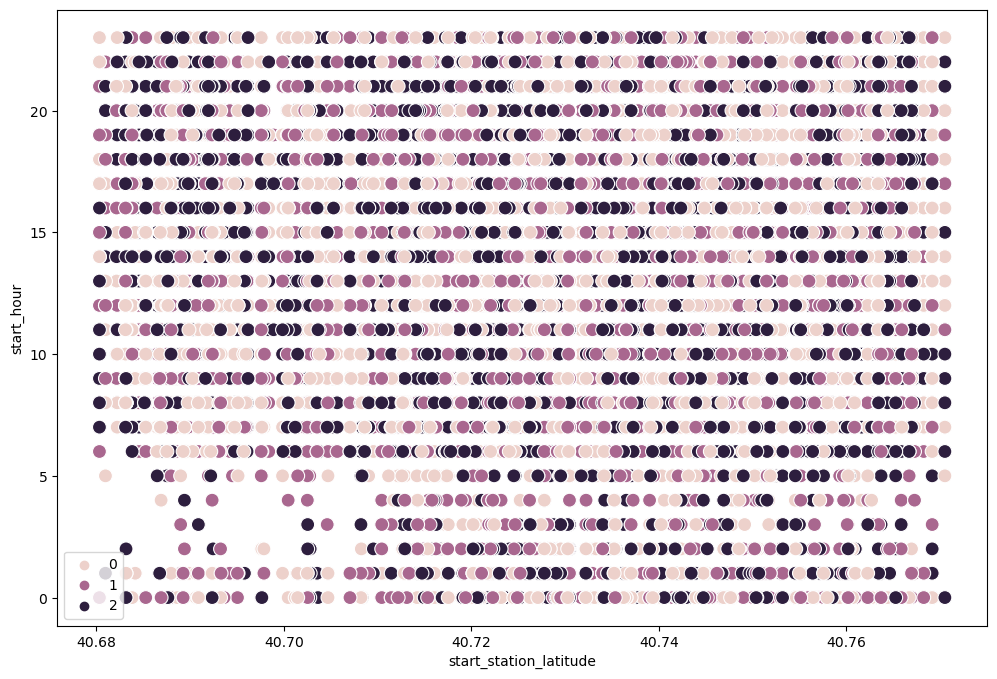

In [25]:
# Lastly start_station_latitude and start_hour.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['start_station_latitude'], y=df1['start_hour'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_station_latitude') # Label x-axis.
plt.ylabel('start_hour') # Label y-axis.
plt.show()

## Plott analysis

### the cluster for three plots are scrumbled. that means the algorithm has failed to identify meaningfull pattern in the data. so the K-mean algorithms might not be suitable for this dataset.¶
​

In [29]:
df1.groupby('clusters').agg({'trip_duration':['mean', 'median'], 
                         'start_station_latitude':['mean', 'median'], 
                         'end_station_latitude':['mean', 'median']})

trip_duration        start_station_latitude             \
                  mean median                   mean     median   
clusters                                                          
0           833.573991  669.0              40.734441  40.736245   
1           841.685071  676.0              40.734325  40.736197   
2           841.612444  672.0              40.733766  40.735354   

         end_station_latitude             
                         mean     median  
clusters                                  
0                   40.734076  40.735439  
1                   40.733945  40.735439  
2                   40.733573  40.735243